# __Лабораторная работа № 1__
## Создание "истории о данных" (Data Storytelling)
## _Саклаков И.К. ИУ5-21М_

<b>Цель лабораторной работы:</b> изучение различных методов визуализация данных и создание истории на основе данных.

<b>Краткое описание: </b> построение графиков, помогающих понять структуру данных, и их интерпретация.

### Задание:
- Выбрать набор данных (датасет). Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.
- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
  1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию. 
  1. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.  
  1. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов. 
  1. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика. 
  1. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.

In [1]:
# !pip install pycountry_convert

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgbm
import pycountry_convert as pc
import plotly.express as px

## __Описание датасета__

В оценках и рейтингах счастья используются данные Всемирного опроса Гэллапа . Столбцы, следующие за оценкой счастья, оценивают степень, в которой каждый из шести факторов – экономическое производство, социальная поддержка, ожидаемая продолжительность жизни, свобода, отсутствие коррупции и щедрость – способствуют тому, чтобы оценки жизни в каждой стране были выше, чем в Антиутопии, гипотетической стране, значения которой равны самым низким национальным средним показателям в мире для каждого из шести факторов. Они не влияют на общий балл по каждой стране, но объясняют, почему некоторые страны занимают более высокие места, чем другие.

In [2]:
df = pd.read_csv('../input/world-happiness-report-2021/world-happiness-report.csv')
df.head(3)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,0.618,0.275


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


## __Шаг 1.__

In [4]:
df2 = df[df['year'] == 2019].set_index('Country name')
temp = pd.DataFrame(df2['Life Ladder']).reset_index()

#ADAPTING TO THE ISO 3166 STANDARD
temp.loc[temp['Country name'] == 'Taiwan Province of China', 'Country name'] = 'Taiwan, Province of China' 
temp.loc[temp['Country name'] == 'Congo (Brazzaville)','Country name'] = 'Congo'
temp.loc[temp['Country name'] == 'Congo (Kinshasa)','Country name'] = 'Congo'
temp.loc[temp['Country name'] == 'Somaliland region','Country name'] = 'Somalia' 
temp.loc[temp['Country name'] == 'Palestinian Territories','Country name'] = 'Palestine, State of' 
temp.loc[temp['Country name'] == 'Hong Kong S.A.R. of China', 'Country name'] = 'Hong Kong'
temp.drop(index=temp[temp['Country name'] == 'Kosovo'].index, inplace=True) # Kosovo Code agreed on not to use by ISO 3166
temp.drop(index=temp[temp['Country name'] == 'North Cyprus'].index, inplace=True) # Not part of the ISO 3166 standard


In [5]:
temp['iso_alpha'] = temp['Country name'].apply(lambda x:pc.country_name_to_country_alpha3(x,))
fig = px.choropleth(temp, locations='iso_alpha',
                    color='Life Ladder',
                    hover_name='Country name',
                    color_continuous_scale=px.colors.diverging.RdYlGn,
                   )
fig.update_layout(
    title_text='World map - Ladder score 2019',
    geo_showframe=False,
    title_font_size=22,
)
fig.show()

## __Шаг 2.__

<function matplotlib.pyplot.show(close=None, block=None)>

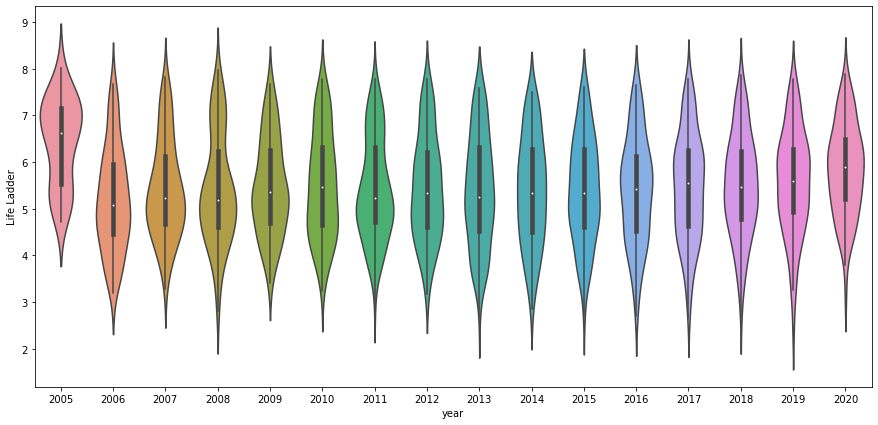

In [6]:
plt.figure(figsize=(15,7))
sns.violinplot(x= "year",y= "Life Ladder",data= df)
plt.show

## __Шаг 3.__

Плотность распределения количественных переменных в зависимости от уровня счастья

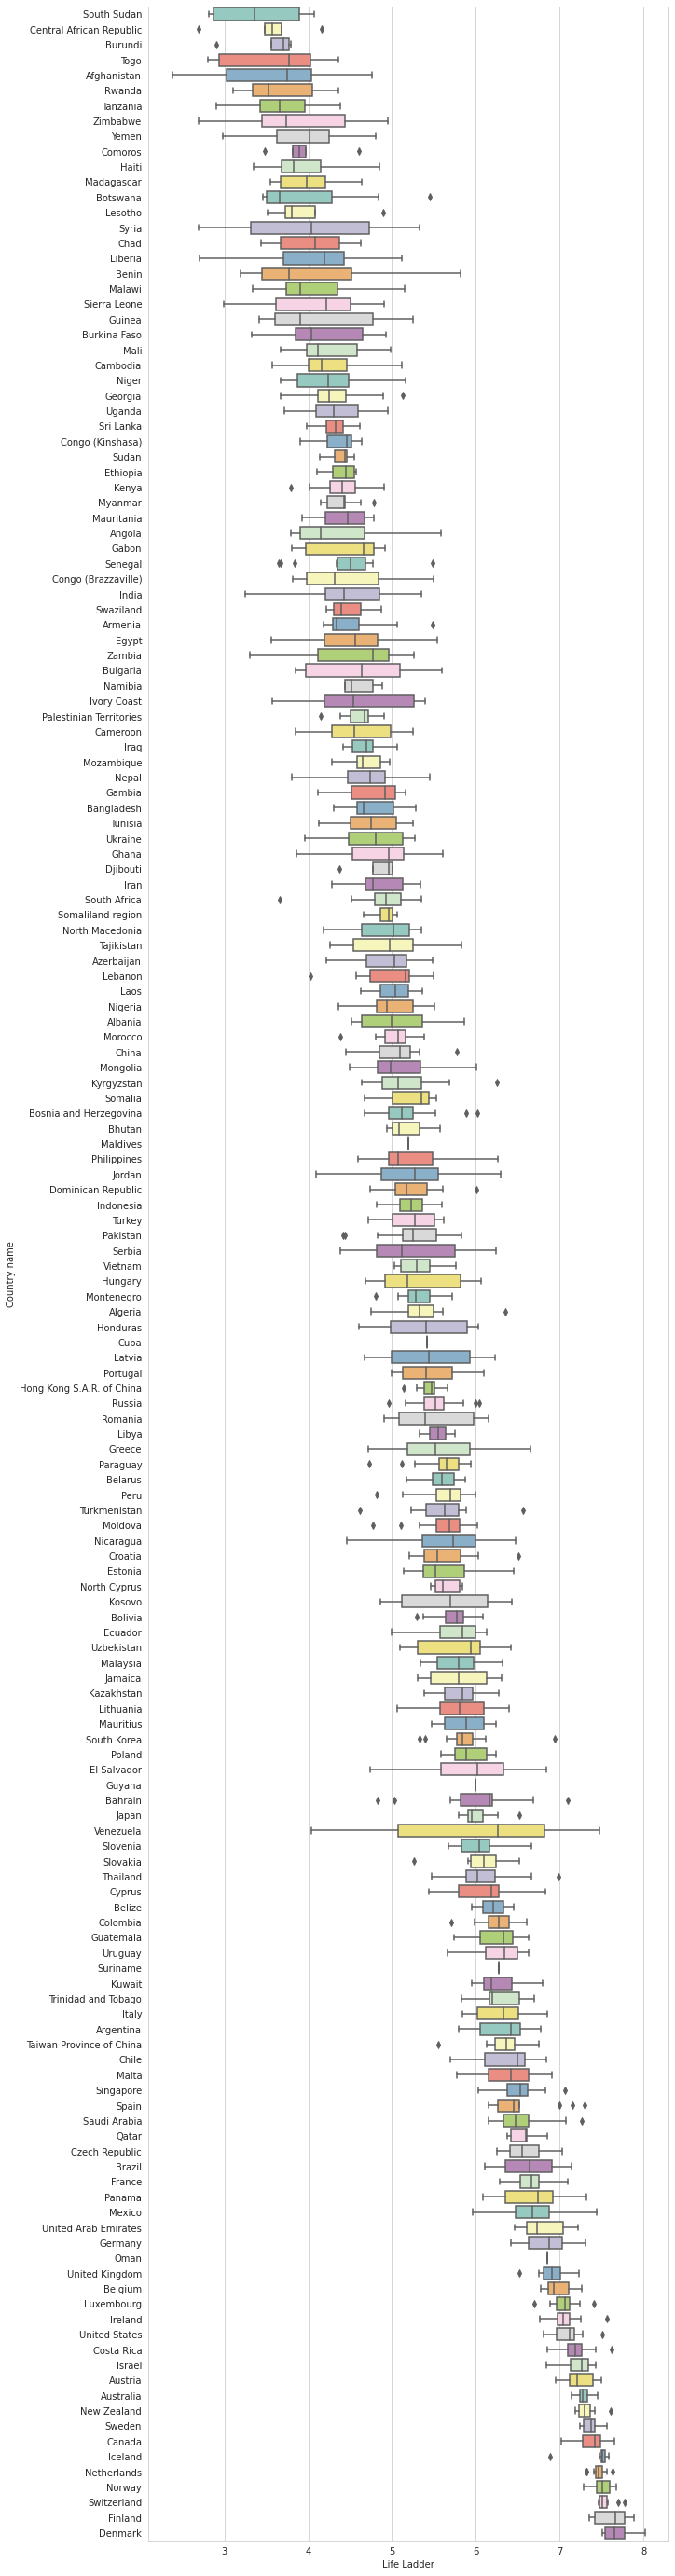

In [7]:
my_order = df.groupby('Country name')['Life Ladder'].mean().reset_index().sort_values('Life Ladder')["Country name"]
plt.figure(figsize=(10,50))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Life Ladder", y="Country name", data=df, palette="Set3", order = my_order)
plt.show()

## __Шаг 4.__


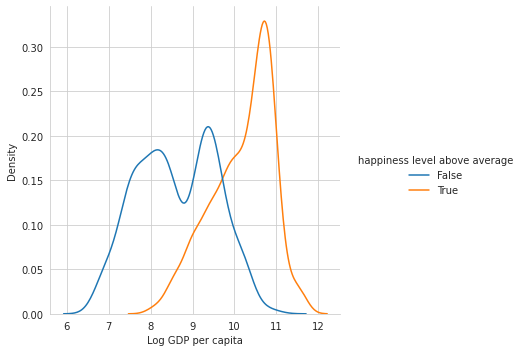

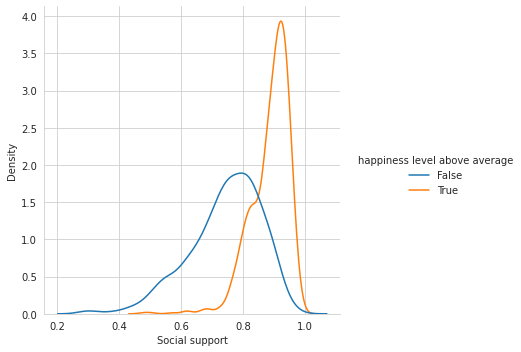

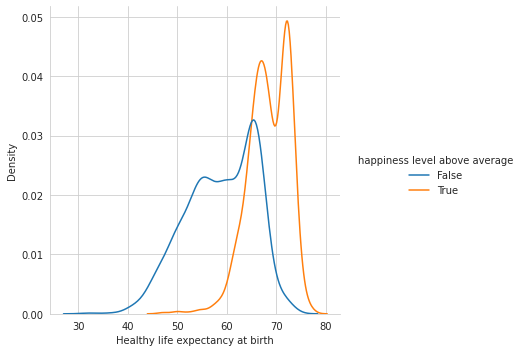

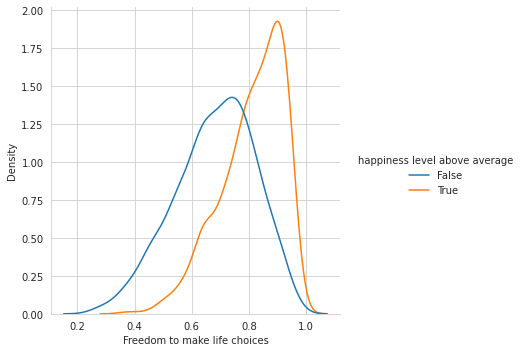

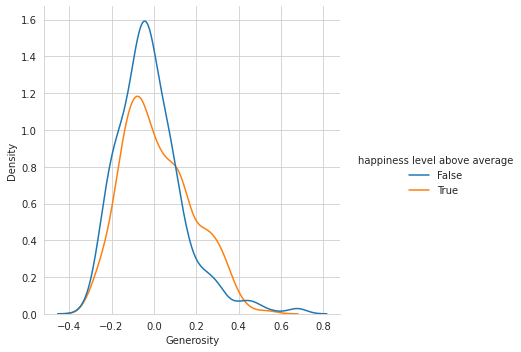

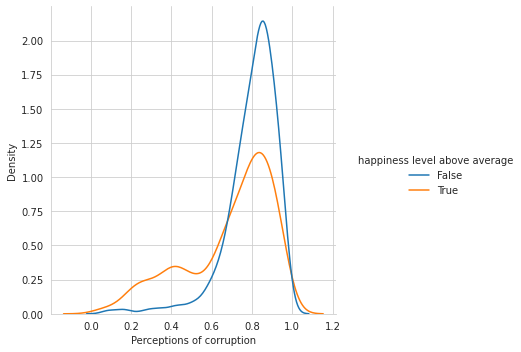

In [8]:
df["happiness level above average"] = df["Life Ladder"] > df["Life Ladder"].mean()

continuous = ['Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Life Ladder']
    
sns.displot(df, x=continuous[0], hue="happiness level above average", kind = "kde")
sns.displot(df, x=continuous[1], hue="happiness level above average", kind = "kde")
sns.displot(df, x=continuous[2], hue="happiness level above average", kind = "kde")
sns.displot(df, x=continuous[3], hue="happiness level above average", kind = "kde")
sns.displot(df, x=continuous[4], hue="happiness level above average", kind = "kde")
sns.displot(df, x=continuous[5], hue="happiness level above average", kind = "kde")

## __Шаг 5.__

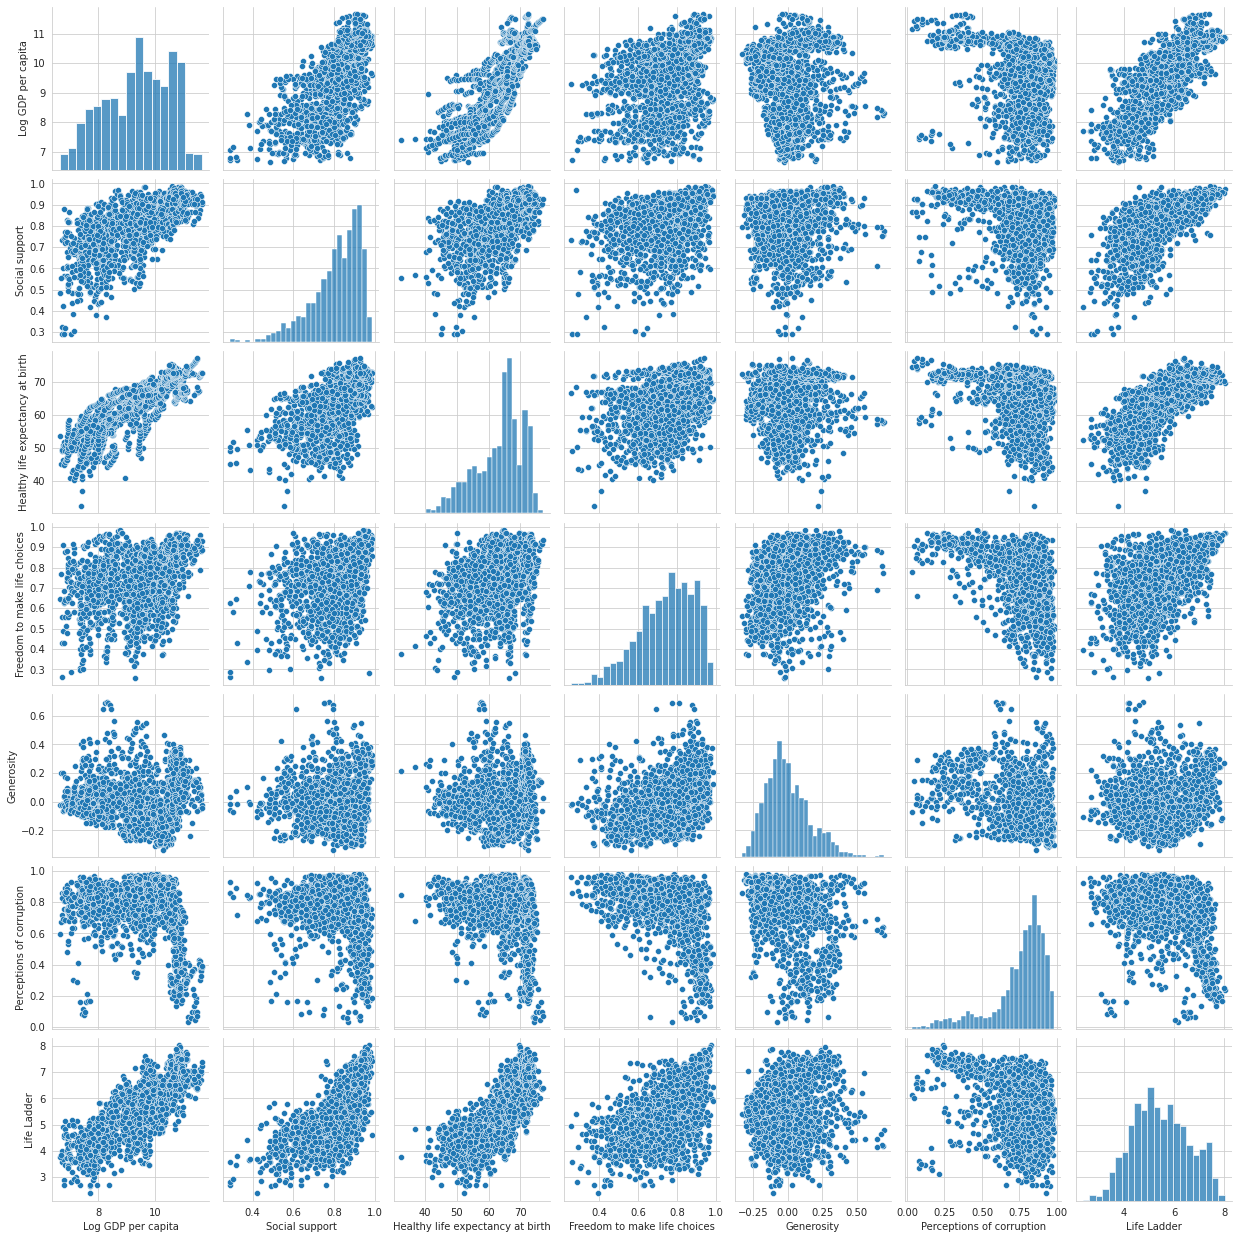

In [9]:
sns.pairplot(df[continuous])

## __Шаг 6.__

<AxesSubplot:>

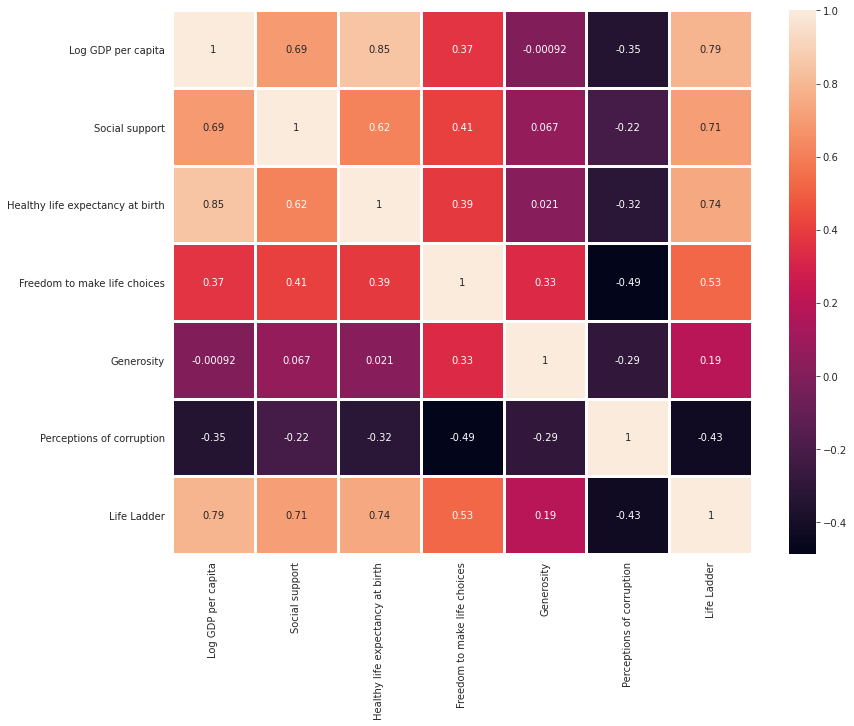

In [10]:
plt.figure(figsize=(13,10))
sns.heatmap(df[continuous].corr(), annot=True, linewidths=3)